In [1]:
import numpy as np

# Replace 'points.txt' with your actual filename
points = np.loadtxt('20250901FullBTSTDataRed.txt')

# Now points is a NumPy array of shape (n, 3)
print(points)


[[ 1188.63074   -89.92552  2660.71899]
 [ 1188.41846   -89.87897  2660.41333]
 [ 1188.37476   -90.146    2660.81543]
 ...
 [-1005.4071    -59.10512  2660.30688]
 [  846.23315   835.00885  1897.23743]
 [  691.95038   967.09753  1855.72656]]


In [ ]:
import open3d as o3d
import numpy as np

# Load points
#points = np.loadtxt("20250901FullBTSTDataRed.txt")

# Convert to Open3D point cloud
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(points)

# Estimate normals
pcd.estimate_normals()

# Reconstruct mesh
mesh, densities = o3d.geometry.TriangleMesh.create_from_point_cloud_poisson(pcd, depth=9)

# Save mesh
o3d.io.write_triangle_mesh("output_mesh.stl", mesh)


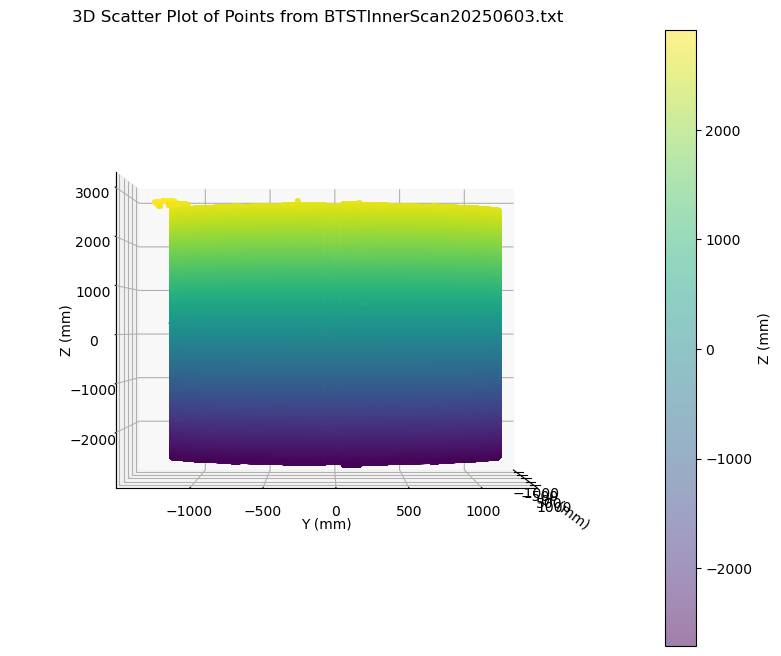

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the data points
#points = np.loadtxt('BTSTInnerScan20250603.txt')
x, y, z = points[:, 0], points[:, 1], points[:, 2]

# 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(x, y, z, c=z, cmap='viridis', s=5, alpha=0.5)

# Colorbar and labels
cbar = plt.colorbar(scatter, ax=ax, label='Z (mm)')
ax.set_xlabel('X (mm)')
ax.set_ylabel('Y (mm)')
ax.set_zlabel('Z (mm)')
ax.set_title('3D Scatter Plot of Points from BTSTInnerScan20250603.txt')

# Rotate view to horizontal (cylinder along X)
ax.view_init(elev=0, azim=0)

plt.show()


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from datetime import datetime

# Load the data
# points = np.loadtxt('BTSTInnerScan20250603.txt')

# Extract x, y, z columns
x = points[:, 0]
y = points[:, 1]
z = points[:, 2]

print("Min Z:", np.min(z))
print("Max Z:", np.max(z))

# Filter out points with |Z| > 2625
mask = np.abs(z) <= 2625
x = x[mask]
y = y[mask]
z = z[mask]

# Compute cylindrical radius
r = np.sqrt(x**2 + y**2)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot points, colored by radius, with fixed color limits and semi-transparency
scatter = ax.scatter(x, y, z, c=r, cmap='viridis', s=5, vmin=1187, vmax=1195, alpha=0.5)

# Add color bar and labels
cbar = plt.colorbar(scatter, ax=ax, label='Radius (mm)')
ax.set_xlabel('X (mm)')
ax.set_ylabel('Y (mm)')
ax.set_zlabel('Z (mm)')
ax.set_title('3D Scatter Plot Colored by Radius (1191 ± 4 mm)')

# Rotate the viewpoint: horizontal cylinder
ax.view_init(elev=0, azim=0)

# Generate filename with current execution date
date_str = datetime.now().strftime("%Y%m%d")
filename = f"BTSTInnerScan20250603_radius_new_{date_str}.jpg"

# Save as JPG (300 dpi for good quality)
plt.savefig(filename, dpi=300, format='jpg')

plt.show()


Min Z: -2709.37866
Max Z: 2909.98267


KeyboardInterrupt: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Load the data
#points = np.loadtxt('20250901FullBTSTDataRed.txt')

# Extract x, y, z columns
x = points[:, 0]
y = points[:, 1]
z = points[:, 2]

# Filter out points with |Z| > 2650
mask = np.abs(z) <= 2650
x = x[mask]
y = y[mask]
z = z[mask]

# Compute cylindrical coordinates
r = np.sqrt(x**2 + y**2)
theta = np.degrees(np.arctan2(y, x))  # angle in degrees
theta = np.mod(theta, 360)  # normalize to [0, 360)

# Create 2D scatter plot
fig, ax = plt.subplots(figsize=(12, 6))

scatter = ax.scatter(theta, z, c=r, cmap='viridis', s=5, vmin=1187, vmax=1195)

# Colorbar
cbar = plt.colorbar(scatter, ax=ax, label='Radius (mm)')
ax.set_xlabel('Angular Location θ (degrees)')
ax.set_ylabel('Z (mm)')
ax.set_title('Unwrapped Cylindrical View: θ vs Z colored by Radius (1191 ± 4 mm)')

# Save with date
date_str = datetime.now().strftime("%Y%m%d")
filename = f"BTSTInnerScan20250603_new_thetaZ_{date_str}.jpg"
plt.savefig(filename, dpi=300, format='jpg')

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Assuming points array is already loaded
x = points[:, 0]
y = points[:, 1]
z = points[:, 2]

# Filter out points with |Z| > 2650
mask = np.abs(z) <= 2650
x = x[mask]
y = y[mask]
z = z[mask]

# Compute radius
r = np.sqrt(x**2 + y**2)

# Define Z bins
bin_width = 50  # mm, adjust as needed
z_bins = np.arange(np.min(z), np.max(z) + bin_width, bin_width)
z_bin_centers = (z_bins[:-1] + z_bins[1:]) / 2

# Collect radii for each Z bin
r_bin_list = []
for i in range(len(z_bins)-1):
    mask_bin = (z >= z_bins[i]) & (z < z_bins[i+1])
    r_bin_list.append(r[mask_bin])

# Create boxplot
plt.figure(figsize=(12, 6))
plt.boxplot(r_bin_list, positions=z_bin_centers, widths=bin_width*0.8, showfliers=False)
plt.xlabel('Z (mm)')
plt.ylabel('Radius (mm)')
plt.title('Boxplot Distribution of Radius in Z Bins')
plt.grid(True)

# Save plot
date_str = datetime.now().strftime("%Y%m%d")
filename = f"Radius_boxplot_vs_Z_{date_str}.jpg"
plt.savefig(filename, dpi=300, format='jpg')

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from datetime import datetime

# Assuming points array is already loaded
x = points[:, 0]
y = points[:, 1]
z = points[:, 2]

# Filter out points with |Z| > 2650
mask = np.abs(z) <= 2650
x = x[mask]
y = y[mask]
z = z[mask]

# Compute radius
r = np.sqrt(x**2 + y**2)

# Get current date for filenames
date_str = datetime.now().strftime("%Y%m%d")

# --- Scatter plot Z vs radius ---
plt.figure(figsize=(8, 6))
plt.scatter(r, z, c='blue', s=5, alpha=0.5)
plt.xlabel('Radius (mm)')
plt.ylabel('Z (mm)')
plt.title('Z vs Radial Location of Points')
plt.grid(True)

scatter_filename = f"Z_vs_Radius_scatter_{date_str}.jpg"
plt.savefig(scatter_filename, dpi=300, format='jpg')
plt.show()

# --- 2D histogram / density plot ---
plt.figure(figsize=(8, 6))
plt.hist2d(r, z, bins=100, cmap='viridis')
plt.colorbar(label='Counts')
plt.xlabel('Radius (mm)')
plt.ylabel('Z (mm)')
plt.title('2D Histogram: Z vs Radius')

hist_filename = f"Z_vs_Radius_hist2d_{date_str}.jpg"
plt.savefig(hist_filename, dpi=300, format='jpg')
plt.show()

# Compute correlation coefficient
corr, _ = pearsonr(r, z)
print(f"Pearson correlation coefficient between Z and radius: {corr:.4f}")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Assume points already loaded
X = points[:, 0]
Y = points[:, 1]
Z = points[:, 2]

# Keep points with 0 < Z < 2600
mask = (Z > 0) & (Z < 2600)
X = X[mask]
Y = Y[mask]
Z = Z[mask]

# Radial deviation
nominal_radius = 1191.0
R = np.sqrt(X**2 + Y**2)
R_dev = R - nominal_radius

# Convert to cylindrical coordinates
theta = np.arctan2(Y, X)
theta = (theta + 2*np.pi) % (2*np.pi)
theta_deg = np.degrees(theta)

# Define angular segment (centered at 0°)
segment_deg = 9.474*1
theta_start = segment_deg / 2
theta_end = theta_start + segment_deg

# Mask points in the segment
mask_segment = (theta_deg >= theta_start) & (theta_deg <= theta_end)
theta_seg = theta_deg[mask_segment]
Z_seg = Z[mask_segment]
R_dev_seg = R_dev[mask_segment]

# Create 2D grid for interpolation
n_theta = 200
n_z = 200
theta_grid = np.linspace(theta_start, theta_end, n_theta)
z_grid = np.linspace(Z_seg.min(), Z_seg.max(), n_z)
Theta_grid, Z_grid = np.meshgrid(theta_grid, z_grid)

# Interpolate radial deviation onto the grid
R_grid = griddata(
    points=(theta_seg, Z_seg),
    values=R_dev_seg,
    xi=(Theta_grid, Z_grid),
    method='linear',
    fill_value=0
)

# Plot heatmap
plt.figure(figsize=(8, 6))
im = plt.imshow(
    R_grid,
    extent=[theta_start, theta_end, Z_seg.min(), Z_seg.max()],
    origin='lower',
    aspect='auto',
    cmap='bwr'
)
plt.colorbar(im, label='ΔR (mm)')
plt.xlabel('Angular Position (deg)')
plt.ylabel('Z (mm)')
plt.title(f'Radial Deviation in {segment_deg}° Segment (0 < Z < 2600 mm)')
plt.tight_layout()
plt.show()


### Set of points of BTL


In [9]:
import numpy as np

def generate_cylindrical_target_points(
    radius=1191,
    num_angles=38,
    angle_offset_deg=9.474/2,
    z_positions_new=[26, 436, 846, 1243.5, 1468.5, 1941.75, 2415, 2500, 2559]
):
    """
    Generate 3D points on the surface of a cylinder for given new Z positions and angular spacing.

    Parameters:
        radius (float): Radius of the cylinder (mm)
        num_angles (int): Number of angular divisions (rows)
        angle_offset_deg (float): Initial angular offset in degrees
        z_positions_new (list): List of new Z-coordinates (will be mirrored + and -)

    Returns:
        points (np.ndarray): Array of shape (num_angles * len(z_positions_new) * 2, 3)
    """
    # Convert degrees to radians
    angles_deg = angle_offset_deg + np.arange(num_angles) * (360 / num_angles)
    angles_rad = np.deg2rad(angles_deg)

    # Include both positive and negative Zs
    full_z_positions = np.array(z_positions_new + [-z for z in z_positions_new])

    # Create meshgrid of angles and Zs
    angle_grid, z_grid = np.meshgrid(angles_rad, full_z_positions)

    # Compute x, y from cylindrical coordinates
    x = radius * np.cos(angle_grid).flatten()
    y = radius * np.sin(angle_grid).flatten()
    z = z_grid.flatten()

    points = np.vstack((x, y, z)).T
    return points

def add_lateral_circumferential_rows(points, radius=1191, arc_offset_mm=13):
    """
    For each point on the cylinder, create two new points at ±arc_offset_mm along the circumference.

    Parameters:
        points (np.ndarray): Original points of shape (N, 3)
        radius (float): Radius of the cylinder (mm)
        arc_offset_mm (float): Offset along the arc in mm

    Returns:
        all_points (np.ndarray): Original points + 2 new points per original = shape (3N, 3)
    """
    # Convert (x, y) to angle
    x, y, z = points[:, 0], points[:, 1], points[:, 2]
    angles = np.arctan2(y, x)

    # Arc offset in radians
    arc_offset_rad = arc_offset_mm / radius

    # Generate two new angles
    angles_plus = angles + arc_offset_rad
    angles_minus = angles - arc_offset_rad

    # Compute new x, y for ± offset
    x_plus = radius * np.cos(angles_plus)
    y_plus = radius * np.sin(angles_plus)

    x_minus = radius * np.cos(angles_minus)
    y_minus = radius * np.sin(angles_minus)

    # Stack all points
    original_points = np.vstack((x, y, z)).T
    plus_points = np.vstack((x_plus, y_plus, z)).T
    minus_points = np.vstack((x_minus, y_minus, z)).T

    all_points = np.vstack((original_points, plus_points, minus_points))
    return all_points

(2052, 3)
First 5 target points (x, y, z) in mm:
[[1186.93186013   98.35527138   26.        ]
 [1154.55491101  292.37639689   26.        ]
 [1090.68471362  478.42225645   26.        ]
 [ 997.06348045  651.41800402   26.        ]
 [ 876.24495468  806.64476655   26.        ]]
First 5 points of the cylinder surface (x, y, z):
[[ 1191.             0.         -2650.        ]
 [ 1188.60213168    75.53788831 -2650.        ]
 [ 1181.41818208   150.77161221 -2650.        ]
 [ 1169.47707844   225.39823203 -2650.        ]
 [ 1152.82690336   299.11725273 -2650.        ]]


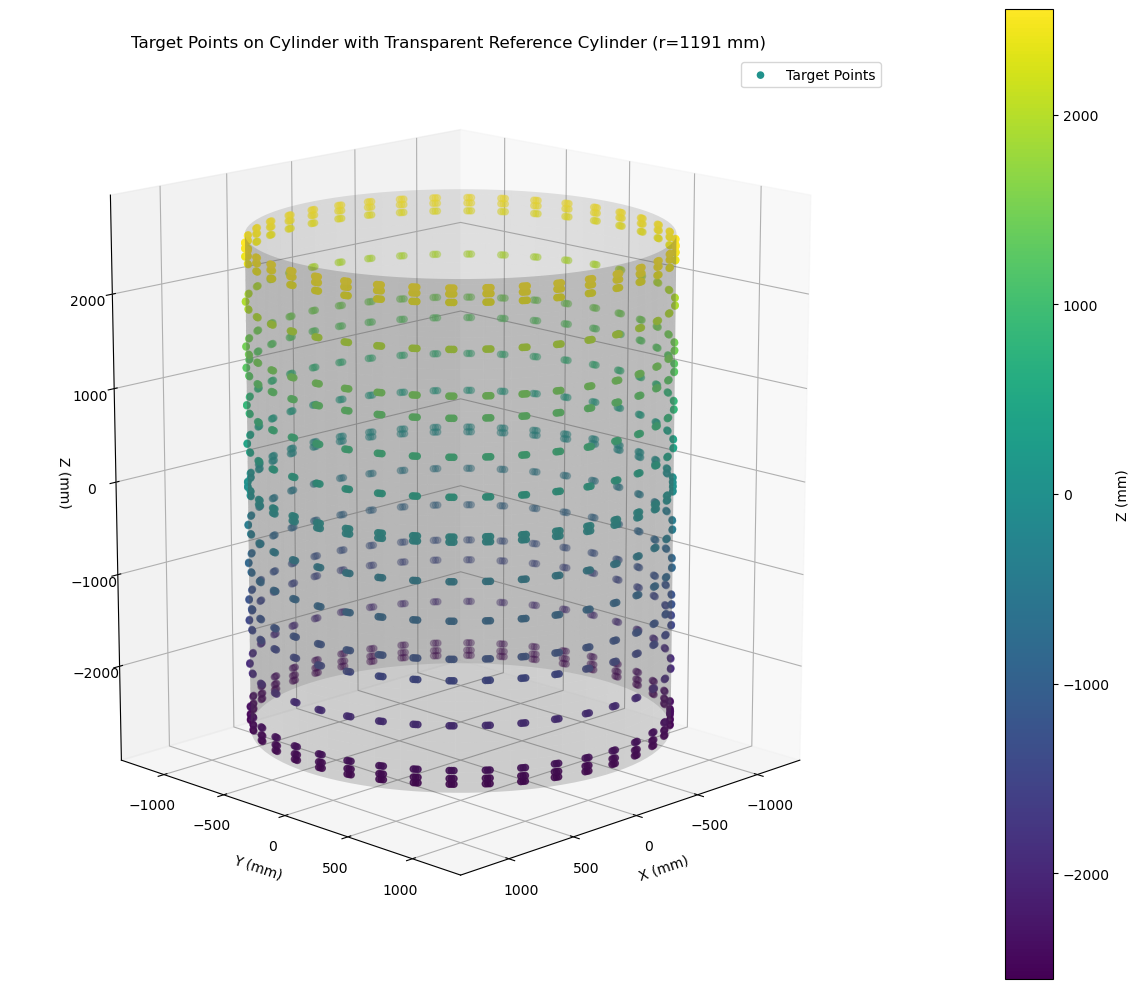

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Generate target points on the cylinder
#targets = generate_cylindrical_target_points()
base_points = generate_cylindrical_target_points()
targets = add_lateral_circumferential_rows(base_points)
all_points = targets
print(all_points.shape)  # Should be (3 * original_number_of_points, 3)


x, y, z = targets[:, 0], targets[:, 1], targets[:, 2]

# Show the first few target points
print("First 5 target points (x, y, z) in mm:")
print(targets[:5])

# Create 3D scatter plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the target points
scatter = ax.scatter(x, y, z, c=z, cmap='viridis', s=20, marker='o', label='Target Points')

# Create transparent cylinder
def draw_cylinder(ax, radius=1191, zmin=-2650, zmax=2650, resolution=100, alpha=0.2):
    theta = np.linspace(0, 2 * np.pi, resolution)
    z_cyl = np.linspace(zmin, zmax, resolution)
    theta_grid, z_grid = np.meshgrid(theta, z_cyl)
    x_cyl = radius * np.cos(theta_grid)
    y_cyl = radius * np.sin(theta_grid)

    # Flatten arrays for inspection
    x_flat = x_cyl.flatten()
    y_flat = y_cyl.flatten()
    z_flat = z_grid.flatten()

    # Stack into (N, 3) shape
    points = np.vstack((x_flat, y_flat, z_flat)).T

    print("First 5 points of the cylinder surface (x, y, z):")
    print(points[:5])
    
    ax.plot_surface(x_cyl, y_cyl, z_grid, color='gray', alpha=alpha, linewidth=0, zorder=0)

# Draw cylinder
draw_cylinder(ax)

# Axis labels and colorbar
cbar = fig.colorbar(scatter, ax=ax, pad=0.1, label='Z (mm)')
ax.set_xlabel('X (mm)')
ax.set_ylabel('Y (mm)')
ax.set_zlabel('Z (mm)')
ax.set_title('Target Points on Cylinder with Transparent Reference Cylinder (r=1191 mm)')

# Aspect ratio
ax.set_box_aspect([1, 1, 1.2])  # Adjust as needed
ax.view_init(elev=15, azim=45)

plt.legend()
plt.tight_layout()
plt.show()


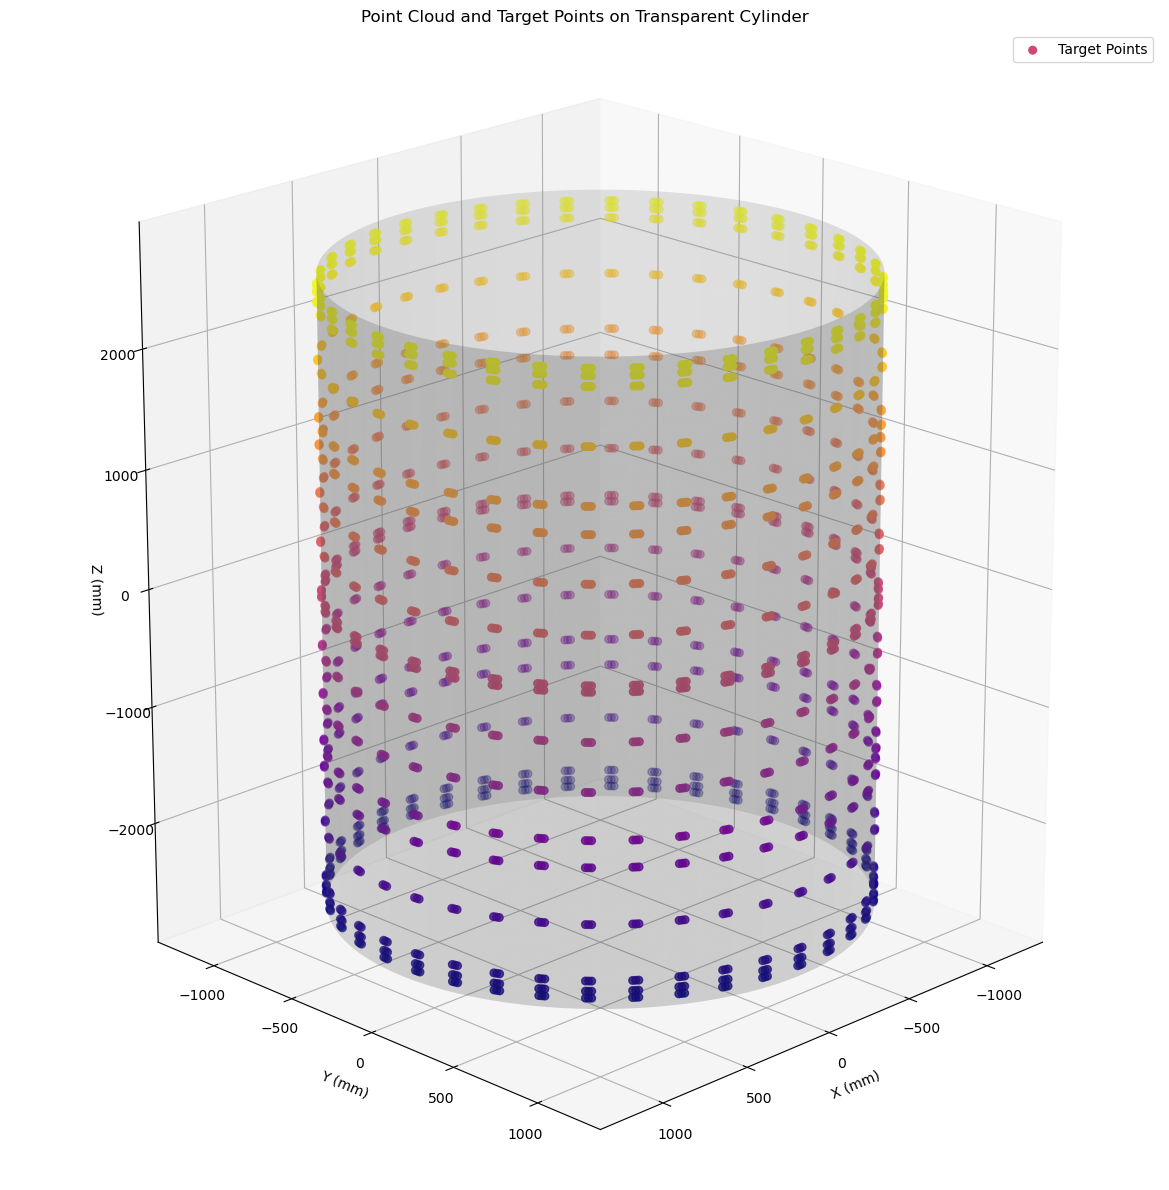

In [11]:
import numpy as np
import matplotlib.pyplot as plta
from mpl_toolkits.mplot3d import Axes3D

# Assume points is already loaded as a numpy array (n,3)
# points = np.loadtxt('BTSTInnerScan20250603.txt')

# Extract point cloud coordinates
px, py, pz = points[:, 0], points[:, 1], points[:, 2]

# Generate target points on the cylinder
base_points = generate_cylindrical_target_points()
targets = add_lateral_circumferential_rows(base_points)
tx, ty, tz = targets[:, 0], targets[:, 1], targets[:, 2]

fig = plt.figure(figsize=(14, 12))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of raw points with transparency
#cloud_scatter = ax.scatter(px, py, pz, c=pz, cmap='viridis', s=3, alpha=0.15, label='Point Cloud')

# Scatter plot of target points, more visible
target_scatter = ax.scatter(tx, ty, tz, c=tz, cmap='plasma', s=30, marker='o', label='Target Points')

# Draw transparent cylinder
def draw_cylinder(ax, radius=1191, zmin=-2650, zmax=2650, resolution=100, alpha=0.2):
    theta = np.linspace(0, 2 * np.pi, resolution)
    z_cyl = np.linspace(zmin, zmax, resolution)
    theta_grid, z_grid = np.meshgrid(theta, z_cyl)
    x_cyl = radius * np.cos(theta_grid)
    y_cyl = radius * np.sin(theta_grid)

    ax.plot_surface(x_cyl, y_cyl, z_grid, color='gray', alpha=alpha, linewidth=0, zorder=0)

draw_cylinder(ax)

# Add colorbar for point cloud z-values
#cbar = fig.colorbar(cloud_scatter, ax=ax, pad=0.1, label='Z (mm)')

# Labels, title, legend
ax.set_xlabel('X (mm)')
ax.set_ylabel('Y (mm)')
ax.set_zlabel('Z (mm)')
ax.set_title('Point Cloud and Target Points on Transparent Cylinder')
ax.legend()

# Aspect ratio and view angle
ax.set_box_aspect([1, 1, 1.2])
ax.view_init(elev=20, azim=45)

plt.tight_layout()
plt.show()


### Nearest Neighbor Search

Given a target point \((x_0, y_0, z_0)\) and a set of points \((x_i, y_i, z_i)\), compute the Euclidean distance:

$$
d_i = \sqrt{(x_i - x_0)^2 + (y_i - y_0)^2 + (z_i - z_0)^2}
$$

Sort all distances and select the \(N\) points with the smallest values of \(d_i\).


In [12]:
import numpy as np

def find_closest_points(points, target_point, N=5, z_limit=2650):
    """
    Find the N closest points to a target point, restricted by |Z| <= z_limit.

    Parameters:
        points (np.ndarray): Array of shape (n, 3) with x, y, z coordinates.
        target_point (tuple or np.ndarray): The (x, y, z) target point.
        N (int): Number of closest points to return.
        z_limit (float): Maximum absolute Z value allowed for points.

    Returns:
        np.ndarray: Array of shape (M, 3) with the closest points,
                    where M <= N if not enough valid points exist.
    """
    # Ensure inputs are NumPy arrays
    points = np.asarray(points)
    target = np.asarray(target_point)

    # Filter points by Z-limit
    mask = np.abs(points[:, 2]) <= z_limit
    filtered_points = points[mask]

    if filtered_points.size == 0:
        print(f"⚠️ No points within |Z| <= {z_limit}. Returning target itself.")
        return np.array([target])

    # Compute Euclidean distances
    distances = np.linalg.norm(filtered_points - target, axis=1)

    # Adjust N if fewer points are available
    if len(filtered_points) < N:
        print(f"⚠️ Requested {N} points, but only {len(filtered_points)} within |Z| <= {z_limit}. Returning all.")
        N = len(filtered_points)

    # Get indices of N smallest distances
    nearest_indices = np.argsort(distances)[:N]

    return filtered_points[nearest_indices]


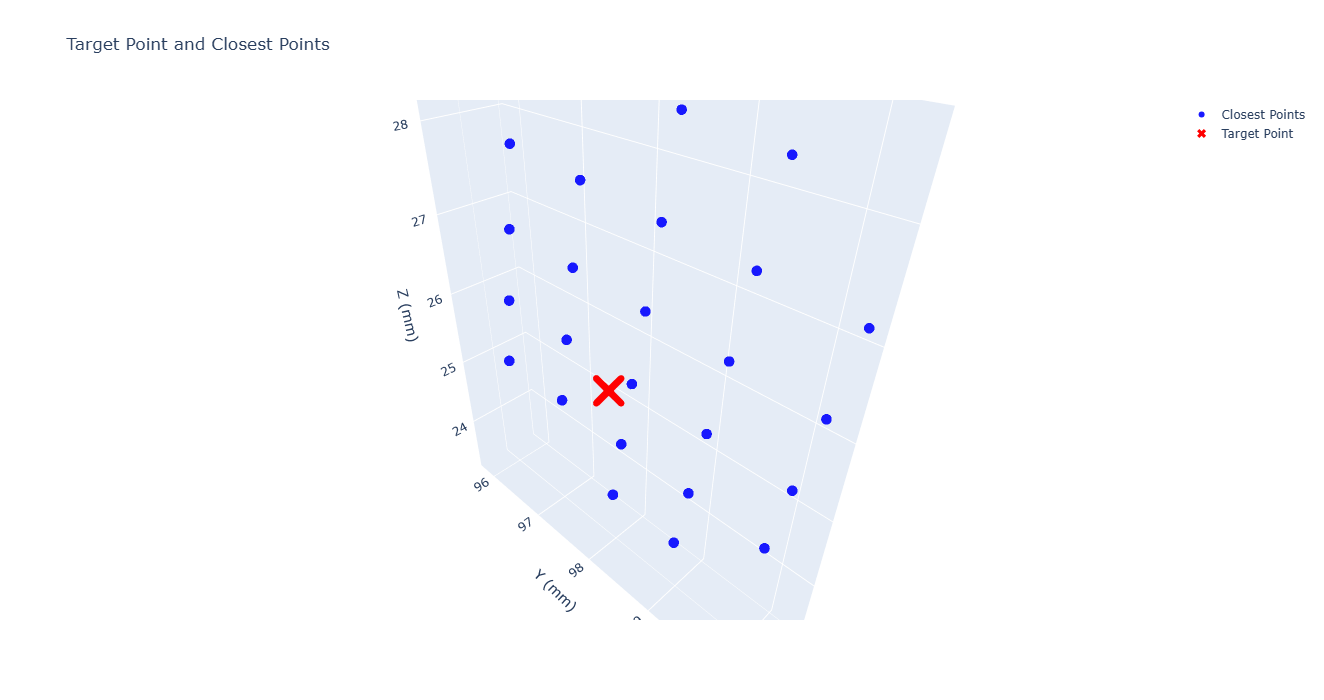

In [13]:
import plotly.graph_objects as go
import numpy as np

# Example target and closest points (replace with your actual data)
target = targets[0]  # (x, y, z)
closest_points = find_closest_points(points, target, N=25)  # Assuming function is defined

# Extract coordinates
px, py, pz = points[:, 0], points[:, 1], points[:, 2]
cx, cy, cz = closest_points[:, 0], closest_points[:, 1], closest_points[:, 2]
tx, ty, tz = target

fig = go.Figure()

# Plot closest points (highlighted)
fig.add_trace(go.Scatter3d(
    x=cx, y=cy, z=cz,
    mode='markers',
    marker=dict(size=6, color='blue', opacity=0.9),
    name='Closest Points'
))

# Plot the target point
fig.add_trace(go.Scatter3d(
    x=[tx], y=[ty], z=[tz],
    mode='markers',
    marker=dict(size=8, color='red', symbol='x'),
    name='Target Point'
))

fig.update_layout(
    title='Target Point and Closest Points',
    scene=dict(
        xaxis_title='X (mm)',
        yaxis_title='Y (mm)',
        zaxis_title='Z (mm)',
        aspectmode='data'
    ),
    width=900,
    height=700,
)

fig.show()


### Quadratic Surface Fitting

We fit a surface of the form:

$$
z(x, y) = a x^2 + b y^2 + c x y + d x + e y + f
$$

Given a set of 3D points \((x_i, y_i, z_i)\), we construct a design matrix \(A\):

$$
A = \begin{bmatrix}
x_1^2 & y_1^2 & x_1 y_1 & x_1 & y_1 & 1 \\
x_2^2 & y_2^2 & x_2 y_2 & x_2 & y_2 & 1 \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
x_n^2 & y_n^2 & x_n y_n & x_n & y_n & 1
\end{bmatrix}
$$

And solve the least squares problem:

$$
A \cdot \vec{c} = \vec{z}
$$

Where:

- \( \vec{c} = [a, b, c, d, e, f]^T \)
- \( \vec{z} = [z_1, z_2, \dots, z_n]^T \)

We obtain the best-fit coefficients by minimizing the squared error:

$$
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (z_i - \hat{z}_i)^2}
$$


In [14]:
import numpy as np

def fit_quadratic_surface(points_subset):
    """
    Fit a quadratic surface z = ax^2 + by^2 + cxy + dx + ey + f
    to a set of 3D points using least squares.

    Parameters:
        points_subset (np.ndarray): Array of shape (N, 3)

    Returns:
        coeffs (np.ndarray): Coefficients [a, b, c, d, e, f]
        rmse (float): Root Mean Squared Error of the fit
    """
    x = points_subset[:, 0]
    y = points_subset[:, 1]
    z = points_subset[:, 2]

    # Design matrix for quadratic surface
    A = np.column_stack((x**2, y**2, x*y, x, y, np.ones_like(x)))

    # Solve for coefficients using least squares
    coeffs, residuals, rank, s = np.linalg.lstsq(A, z, rcond=None)

    # Predict z values from the model
    z_pred = A @ coeffs

    # Compute RMSE
    rmse = np.sqrt(np.mean((z - z_pred)**2))

    return coeffs, rmse


Quadratic surface coefficients:
z(x, y) = -0.60078x² + 0.02246y² + 4.92381xy + 714.43435x + -5864.24648y + 0.35900
Fit RMSE error: 1.33470 mm


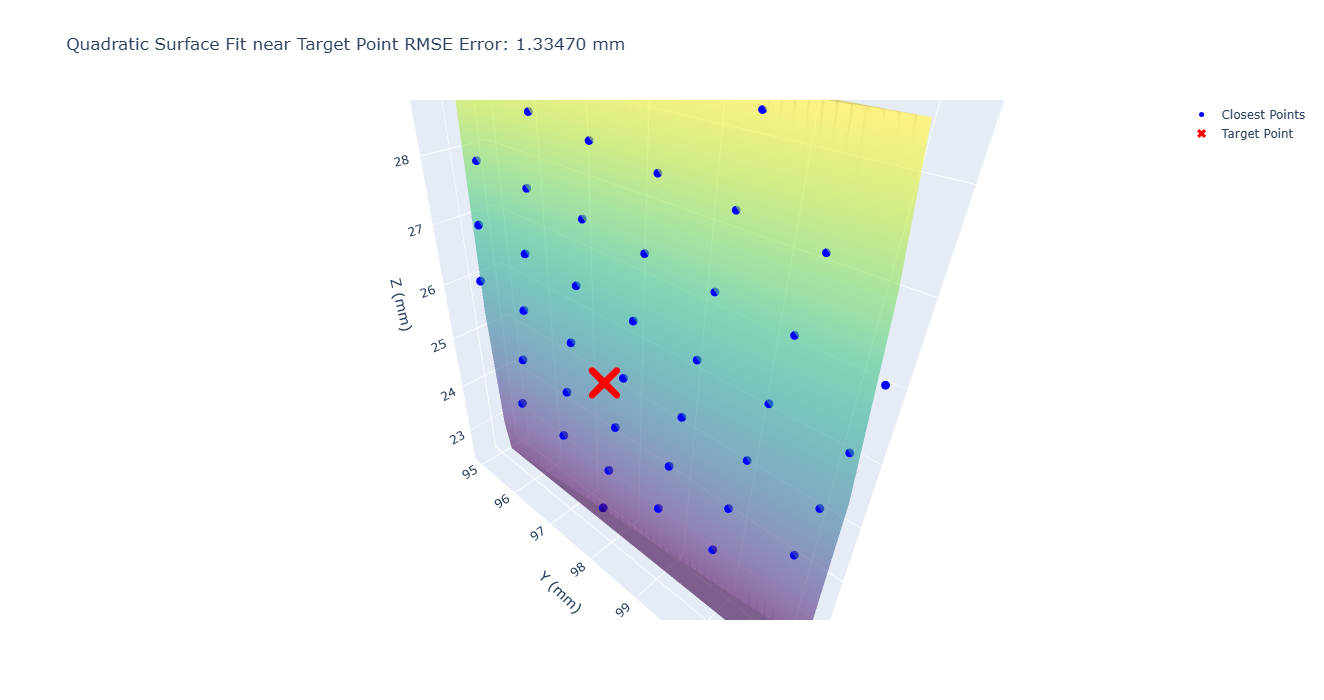

In [15]:
# Pick a target point and number of neighbors
target = targets[0]  # (x, y, z)
target_point=target
N = 40

# Get N closest points
closest_points = find_closest_points(points, target_point, N)

# Fit the quadratic surface
coeffs, error = fit_quadratic_surface(closest_points)

print("Quadratic surface coefficients:")
print("z(x, y) = {:.5f}x² + {:.5f}y² + {:.5f}xy + {:.5f}x + {:.5f}y + {:.5f}".format(*coeffs))
print("Fit RMSE error: {:.5f} mm".format(error))

import numpy as np
import plotly.graph_objects as go

# Use your functions and data:
# target = targets[0]
# closest_points = find_closest_points(points, target, N=25)
# coeffs, error = fit_quadratic_surface(closest_points)

# Extract coefficients for readability
a, b, c, d, e, f = coeffs

# Create grid over the domain of closest points for plotting surface
x_vals = closest_points[:, 0]
y_vals = closest_points[:, 1]

x_min, x_max = x_vals.min(), x_vals.max()
y_min, y_max = y_vals.min(), y_vals.max()

# Create a meshgrid with enough resolution
grid_x, grid_y = np.meshgrid(
    np.linspace(x_min, x_max, 50),
    np.linspace(y_min, y_max, 50)
)

# Compute z on the grid from the quadratic formula:
# z = a*x^2 + b*y^2 + c*x*y + d*x + e*y + f
grid_z = (a * grid_x**2 + b * grid_y**2 + c * grid_x * grid_y +
          d * grid_x + e * grid_y + f)

# Extract data for plotting points
cx, cy, cz = closest_points[:, 0], closest_points[:, 1], closest_points[:, 2]
tx, ty, tz = target

# Compute min and max Z from closest points
z_min, z_max = cz.min(), cz.max()

# Compute quadratic surface as before
grid_z = (a * grid_x**2 + b * grid_y**2 + c * grid_x * grid_y +
          d * grid_x + e * grid_y + f)

# Clip grid_z to be within the Z bounds of closest points
grid_z = np.clip(grid_z, z_min, z_max)

fig = go.Figure()

# Plot the closest points (blue)
fig.add_trace(go.Scatter3d(
    x=cx, y=cy, z=cz,
    mode='markers',
    marker=dict(size=5, color='blue'),
    name='Closest Points'
))

# Plot the target point (red cross)
fig.add_trace(go.Scatter3d(
    x=[tx], y=[ty], z=[tz],
    mode='markers',
    marker=dict(size=8, color='red', symbol='x'),
    name='Target Point'
))

# Plot the fitted quadratic surface as a mesh
fig.add_trace(go.Surface(
    x=grid_x,
    y=grid_y,
    z=grid_z,
    colorscale='Viridis',
    opacity=0.6,
    name='Fitted Surface',
    showscale=False
))

fig.update_layout(
    title=f'Quadratic Surface Fit near Target Point\nRMSE Error: {error:.5f} mm',
    scene=dict(
        xaxis_title='X (mm)',
        yaxis_title='Y (mm)',
        zaxis_title='Z (mm)',
        aspectmode='data'
    ),
    width=900,
    height=700,
)

fig.show()



### Intersection of Surface and Line to Z-Axis

We define a line from the target point \((x_0, y_0, z_0)\) to the point on the Z-axis \((0, 0, z_0)\) using a parametric form:

$$
x(t) = (1 - t) x_0 \\
y(t) = (1 - t) y_0 \\
z(t) = z_0 \quad \text{(remains constant along line)}
$$

We substitute \(x(t)\) and \(y(t)\) into the surface equation:

$$
z_{\text{surface}}(t) = a x(t)^2 + b y(t)^2 + c x(t) y(t) + d x(t) + e y(t) + f
$$

Find \(t\) such that:

$$
z_0 = z_{\text{surface}}(t)
$$

This is solved numerically using a root-finding method like Brent’s algorithm.


In [16]:
from scipy.optimize import root_scalar
import numpy as np
import warnings

def find_surface_line_intersection_extended(
    coeffs, target_point, t_start=0.9, t_end=1.1, xtol=1e-8, rtol=1e-8, z_tol=1e-10
):
    """
    Finds the intersection point between a quadratic surface and a line from (0,0,z_tgt) to (x_tgt, y_tgt, z_tgt),
    and checks that z along the line is constant (i.e., doesn't change with t).

    Parameters:
        coeffs: tuple/list of (a, b, c, d, e, f) for the quadratic surface: z = a*x^2 + b*y^2 + c*x*y + d*x + e*y + f
        target_point: tuple/list (x_tgt, y_tgt, z_tgt) target point for the line from (0,0,z_tgt)
        t_start: start of search interval for parameter t (default 0)
        t_end: end of search interval for parameter t (default 2)
        xtol: absolute error tolerance for root finding (default 1e-8)
        rtol: relative error tolerance for root finding (default 1e-8)
        z_tol: tolerance for checking if z is constant along the line (default 1e-10)

    Returns:
        (intersection_point, t_closest): tuple where intersection_point is (x, y, z) on the line,
        and t_closest is the value of t along the line from (0,0,z_tgt) to target_point.

    Warns:
        Issues a warning if z along the line is not constant (i.e., if z changes as t varies).
    """
    a, b, c, d, e, f = coeffs
    x_tgt, y_tgt, z_tgt = target_point

    # The line: (x, y, z) = (t * x_tgt, t * y_tgt, z_tgt)
    # Correction: User wants the line from (0,0,z_tgt) to (x_tgt, y_tgt, z_tgt)
    # So: (x, y, z) = (t * x_tgt, t * y_tgt, z_tgt), where t in [0, 1]
    # But if you want to actually interpolate from (0,0,z_tgt) to (x_tgt, y_tgt, z_tgt):
    # (x, y, z) = (t * x_tgt, t * y_tgt, z_tgt) for t in [0, 1]
    # z = z_tgt is constant along the line, so check for that.

    # But let's generalize: parametric line from (0,0,z_tgt) to (x_tgt, y_tgt, z_tgt)
    # (x, y, z) = (t * x_tgt, t * y_tgt, z_tgt) for t in [0, 1]
    # z is always z_tgt along the line (so, constant).

    def z_along_line_at_t(t):
        return z_tgt

    z0 = z_along_line_at_t(t_start)
    z1 = z_along_line_at_t(t_end)
    if not np.isclose(z0, z1, atol=z_tol):
        warnings.warn(
            "z is not constant along the line; z changes from t_start to t_end.",
            UserWarning
        )

    def z_surface(x, y):
        return (a * x**2 + b * y**2 + c * x * y + d * x + e * y + f)

    def func(t):
        # Point on the line from (0,0,z_tgt) to (x_tgt, y_tgt, z_tgt)
        x_t = t * x_tgt
        y_t = t * y_tgt
        z_t_line = z_tgt  # z is constant along the line
        z_t_surf = z_surface(x_t, y_t)
        return z_t_line - z_t_surf

    roots = []
    try:
        result = root_scalar(
            func,
            bracket=[t_start, t_end],
            method='brentq',
            xtol=xtol,
            rtol=rtol,
        )
        if result.converged:
            roots.append(result.root)
    except ValueError:
        pass

    if not roots:
        raise RuntimeError("No intersection root found in extended bracket")

    t_closest = min(roots, key=lambda r: abs(r - 1))

    x_int = t_closest * x_tgt
    y_int = t_closest * y_tgt
    z_int = z_tgt  # z is constant along the line

    return (x_int, y_int, z_int), t_closest

Intersection point with the surface: (1186.1577910168628, 98.29112804139803, 26.0)
Parametric t on the line: 0.9993478403109713
Intersection point with the surface: (1186.1577910168628, 98.29112804139803, 26.0)
Parametric t on the line: 0.9993478403109713
Distance between target and intersection: 0.77672 mm


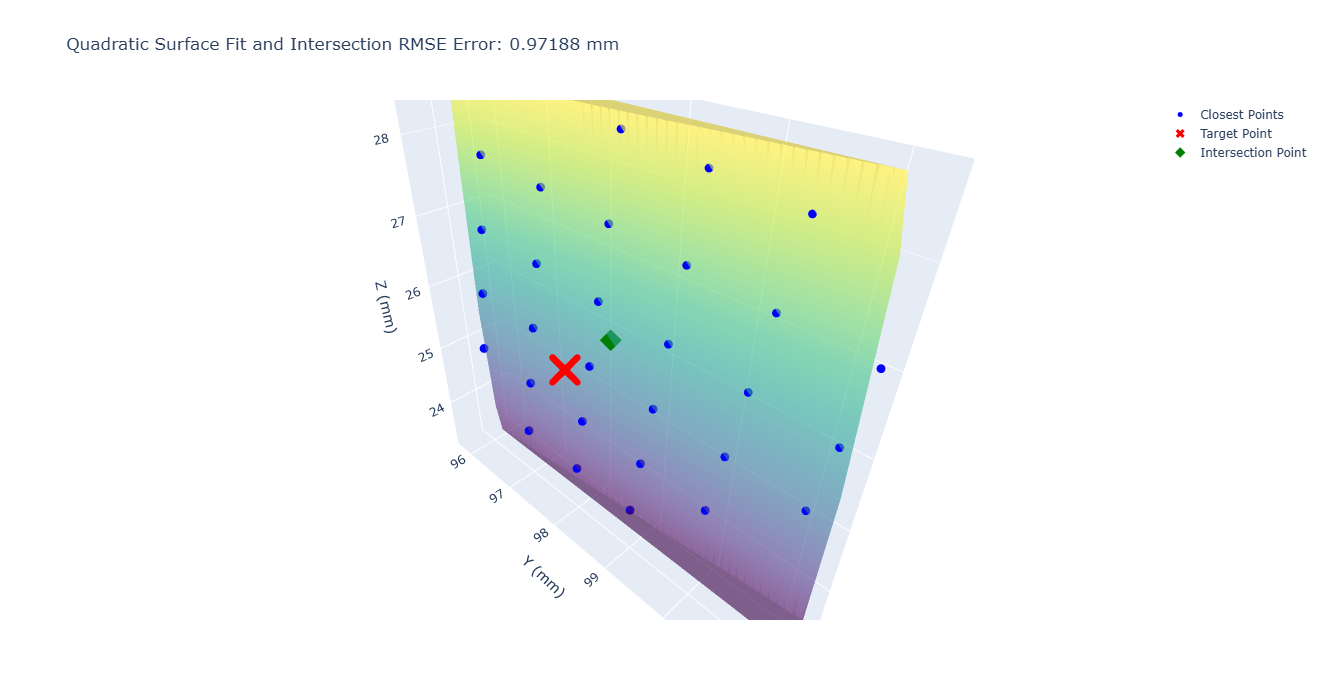

In [17]:
# Define target point
target = targets[0]  # (x, y, z)

# Get N closest points and fit the surface
closest_points = find_closest_points(points, target, N=30)
coeffs, error = fit_quadratic_surface(closest_points)

# Find intersection
intersection_point, t = find_surface_line_intersection_extended(coeffs, target)

print("Intersection point with the surface:", intersection_point)
print("Parametric t on the line:", t)
import numpy as np
import plotly.graph_objects as go

# Calculate Euclidean distance between target and intersection
distance = np.linalg.norm(np.array(intersection_point) - np.array(target))

print("Intersection point with the surface:", intersection_point)
print("Parametric t on the line:", t)
print(f"Distance between target and intersection: {distance:.5f} mm")

# Assume target, closest_points, coeffs, error, intersection_point, t are defined

# Extract coefficients
a, b, c, d, e, f = coeffs

# Domain for grid
x_vals = closest_points[:, 0]
y_vals = closest_points[:, 1]
z_vals = closest_points[:, 2]

x_min, x_max = x_vals.min(), x_vals.max()
y_min, y_max = y_vals.min(), y_vals.max()
z_min, z_max = z_vals.min(), z_vals.max()

# Meshgrid for surface
grid_x, grid_y = np.meshgrid(
    np.linspace(x_min, x_max, 50),
    np.linspace(y_min, y_max, 50)
)

# Quadratic surface values
grid_z = (a * grid_x**2 + b * grid_y**2 + c * grid_x * grid_y +
          d * grid_x + e * grid_y + f)

# Clip z values to data range
grid_z = np.clip(grid_z, z_min, z_max)

# Extract points for plotting
cx, cy, cz = closest_points[:, 0], closest_points[:, 1], closest_points[:, 2]
tx, ty, tz = target
ix, iy, iz = intersection_point

fig = go.Figure()

# Closest points (blue)
fig.add_trace(go.Scatter3d(
    x=cx, y=cy, z=cz,
    mode='markers',
    marker=dict(size=5, color='blue'),
    name='Closest Points'
))

# Target point (red cross)
fig.add_trace(go.Scatter3d(
    x=[tx], y=[ty], z=[tz],
    mode='markers',
    marker=dict(size=8, color='red', symbol='x'),
    name='Target Point'
))

# Intersection point (green diamond)
fig.add_trace(go.Scatter3d(
    x=[ix], y=[iy], z=[iz],
    mode='markers',
    marker=dict(size=8, color='green', symbol='diamond'),
    name='Intersection Point'
))

# Fitted quadratic surface
fig.add_trace(go.Surface(
    x=grid_x,
    y=grid_y,
    z=grid_z,
    colorscale='Viridis',
    opacity=0.6,
    name='Fitted Surface',
    showscale=False
))

fig.update_layout(
    title=f'Quadratic Surface Fit and Intersection\nRMSE Error: {error:.5f} mm',
    scene=dict(
        xaxis_title='X (mm)',
        yaxis_title='Y (mm)',
        zaxis_title='Z (mm)',
        aspectmode='data'
    ),
    width=900,
    height=700,
)

fig.show()


In [ ]:
import numpy as np
import pandas as pd
from concurrent.futures import ProcessPoolExecutor, as_completed
from concurrent.futures import ThreadPoolExecutor, as_completed

# ========== Worker Function ==========
def process_target(idx_target):
    idx, target = idx_target
    try:
        # Step 1: Find closest N points to the target
        closest_pts = find_closest_points(points, target, N=20)

        # Step 2: Fit a quadratic surface to those points
        coeffs, fit_error = fit_quadratic_surface(closest_pts)

        if fit_error > 40:
            print(f"⚠️ Large fit error at target {idx}: RMSE = {fit_error:.2f} mm")

        # Step 3: Find intersection from Z-axis to target
        intersection, t_value = find_surface_line_intersection_extended(coeffs, target)

        # Step 4: Compute distance
        distance = np.linalg.norm(np.array(target) - np.array(intersection))

        if abs(distance) > 3:
            print(f"❌ Rejected target {idx}: Distance = {distance:.2f} mm")
            # Fallback: return closest point
            return None, None, {
                'index': idx,
                'target': target,
                'fallback_point': closest_pts[0],
                'reason': 'Distance too large'
            }

        # ✅ Normal success
        return {
            'index': idx,
            'target': target,
            'intersection': intersection,
            't': t_value,
            'fit_error': fit_error,
            'distance': distance
        }, None, None

    except Exception as e:
        print(f"❌ Failure at target {idx}: {e}")
        try:
            closest_pts = find_closest_points(points, target, N=1)
            return None, None, {
                'index': idx,
                'target': target,
                'fallback_point': closest_pts[0],
                'reason': f'Exception: {e}'
            }
        except Exception as e2:
            return None, {
                'index': idx,
                'target': target,
                'error': str(e2),
                'reason': 'Critical failure'
            }, None

# ========== Main Execution ==========
from concurrent.futures import ThreadPoolExecutor, as_completed

results, failures, fallbacks = [], [], []
futures = []

with ThreadPoolExecutor() as executor:
    for item in enumerate(targets):
        futures.append(executor.submit(process_target, item))

    for f in as_completed(futures):
        res, fail, fb = f.result()
        if res: results.append(res)
        if fail: failures.append(fail)
        if fb: fallbacks.append(fb)

    # Convert to DataFrames for convenience
    df_results = pd.DataFrame(results)
    df_failures = pd.DataFrame(failures)
    df_fallbacks = pd.DataFrame(fallbacks)

    from datetime import date

    # Get today's date in YYYY-MM-DD format
    today = date.today().strftime("%Y-%m-%d")

    # Save to CSV files with date in filename
    df_results.to_csv(f"results_{today}.csv", index=False)
    df_failures.to_csv(f"failures_{today}.csv", index=False)
    df_fallbacks.to_csv(f"fallbacks_{today}.csv", index=False)

    # Print summary
    print(f"\n✅ Successful fits: {len(results)} / {len(targets)}")
    print(f"❌ Failed fits: {len(failures)}")
    print(f"⚠️ Fallbacks used: {len(fallbacks)}")
    



❌ Failure at target 194: No intersection root found in extended bracket
❌ Failure at target 195: No intersection root found in extended bracket
❌ Failure at target 229: No intersection root found in extended bracket
❌ Rejected target 580: Distance = 10.02 mm


In [ ]:
import pandas as pd

# Assuming df_results and df_failures already exist in memory
# If not, load them from a pickle/csv file produced earlier

# Save results to CSV
df_results.to_csv("fit_results2.csv", index=False)
df_failures.to_csv("fit_failures2.csv", index=False)

# Save to Excel (both results and failures in one file, separate sheets)
with pd.ExcelWriter("fit_output2.xlsx", engine="openpyxl") as writer:
    df_results.to_excel(writer, sheet_name="Results", index=False)
    df_failures.to_excel(writer, sheet_name="Failures", index=False)

# Save to Pickle (fastest if you only use Python/pandas later)
df_results.to_pickle("fit_results2.pkl")
df_failures.to_pickle("fit_failures2.pkl")

print("✅ Data saved: fit_results.csv, fit_failures.csv, fit_output.xlsx, and pickles")


In [ ]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go

# ======================
# Load Data
# ======================
# Option A: load from pickle (fastest)
df_results = pd.read_pickle("fit_results2.pkl")
df_failures = pd.read_pickle("fit_failures2.pkl")

# Option B: if CSV is preferred
# df_results = pd.read_csv("fit_results1.csv")
# df_failures = pd.read_csv("fit_failures1.csv")

# ======================
# Compute signed radial distance
# ======================
def radial_distance(row):
    target = np.array(row['target'])
    inter  = np.array(row['intersection'])
    r_target = np.linalg.norm(target[:2])
    r_inter  = np.linalg.norm(inter[:2])
    return r_target - r_inter  # signed difference

df_results["radial_distance"] = df_results.apply(radial_distance, axis=1)

# ======================
# Extract coordinates
# ======================
targets = np.stack(df_results['target'].values)        # shape (N,3)
x_targets, y_targets, z_targets = targets[:,0], targets[:,1], targets[:,2]

x_fit = df_results['intersection'].apply(lambda pt: pt[0]).values
y_fit = df_results['intersection'].apply(lambda pt: pt[1]).values
z_fit = df_results['intersection'].apply(lambda pt: pt[2]).values
radial_dist = df_results['radial_distance'].values

# Failures (may be empty)
if not df_failures.empty:
    failures = np.stack(df_failures['target'].values)
    x_fail, y_fail, z_fail = failures[:,0], failures[:,1], failures[:,2]
else:
    x_fail, y_fail, z_fail = [], [], []

# ======================
# Cylinder surface
# ======================
def create_cylinder(radius=1191, zmin=-2650, zmax=2650, resolution=100):
    theta = np.linspace(0, 2*np.pi, resolution)
    z = np.linspace(zmin, zmax, resolution)
    theta_grid, z_grid = np.meshgrid(theta, z)
    x_grid = radius * np.cos(theta_grid)
    y_grid = radius * np.sin(theta_grid)
    return x_grid, y_grid, z_grid

x_cyl, y_cyl, z_cyl = create_cylinder()

# ======================
# Build Plot
# ======================
fig = go.Figure()

# Cylinder mesh
fig.add_trace(go.Surface(
    x=x_cyl, y=y_cyl, z=z_cyl,
    showscale=False,
    opacity=0.2,
    colorscale="Greys",
    name="Cylinder"
))

# Successful targets (gray)
fig.add_trace(go.Scatter3d(
    x=x_targets, y=y_targets, z=z_targets,
    mode="markers",
    marker=dict(size=3, color="rgba(150,150,150,0.3)"),
    name="Target Points"
))

# Failed targets (red)
fig.add_trace(go.Scatter3d(
    x=x_fail, y=y_fail, z=z_fail,
    mode="markers",
    marker=dict(size=3, color="rgba(255,0,0,0.5)"),
    name="Failed Targets"
))

# Intersections colored by signed radial distance
fig.add_trace(go.Scatter3d(
    x=x_fit, y=y_fit, z=z_fit,
    mode="markers",
    marker=dict(
        size=4,
        color=radial_dist,
        colorscale="RdBu",
        colorbar=dict(title="Δr (mm)", tickformat=".2f"),
        cmin=-np.max(np.abs(radial_dist)),  # symmetric about zero
        cmax= np.max(np.abs(radial_dist)),
    ),
    name="Intersections"
))

# ======================
# Add coordinate axes
# ======================
axis_length = 1500  # mm

# X axis (red)
fig.add_trace(go.Scatter3d(
    x=[0, axis_length],
    y=[0, 0],
    z=[0, 0],
    mode="lines+text",
    line=dict(color="red", width=5),
    text=["", "X"],
    textposition="top center",
    name="X axis"
))

# Y axis (green)
fig.add_trace(go.Scatter3d(
    x=[0, 0],
    y=[0, axis_length],
    z=[0, 0],
    mode="lines+text",
    line=dict(color="green", width=5),
    text=["", "Y"],
    textposition="top center",
    name="Y axis"
))

# Z axis (blue)
fig.add_trace(go.Scatter3d(
    x=[0, 0],
    y=[0, 0],
    z=[0, axis_length],
    mode="lines+text",
    line=dict(color="blue", width=5),
    text=["", "Z"],
    textposition="top center",
    name="Z axis"
))

# ======================
# Layout
# ======================
fig.update_layout(
    width=1000,
    height=800,
    scene=dict(
        xaxis_title="X (mm)",
        yaxis_title="Y (mm)",
        zaxis_title="Z (mm)",
        aspectmode="data"
    ),
    title="3D Plot: Radial Distances Between Targets and Intersections",
    margin=dict(l=0, r=0, b=0, t=40)
)

fig.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Load results
df_results = pd.read_pickle("fit_results1.pkl")

# ==================================================
# Step 1: Nominal cylindrical target grid (angles)
# ==================================================
num_angles = 38
angle_offset_deg = 9.474/2
angles_deg = angle_offset_deg + np.arange(num_angles) * (360 / num_angles)
angles_rad = np.deg2rad(angles_deg)

# ==================================================
# Step 2: Assign each result to nearest angular row
# ==================================================
def get_angle_index(target):
    x, y, z = target
    angle = np.arctan2(y, x)
    # Map to [0, 2π)
    if angle < 0:
        angle += 2*np.pi
    idx = np.argmin(np.abs(angles_rad - angle))
    return idx

df_results["angle_index"] = df_results["target"].apply(get_angle_index)

# ==================================================
# Step 3: Compute signed radial distance (Δr)
# ==================================================
def radial_distance(row):
    target = np.array(row['target'])
    inter  = np.array(row['intersection'])
    r_target = np.linalg.norm(target[:2])
    r_inter  = np.linalg.norm(inter[:2])
    return r_target - r_inter

df_results["radial_distance"] = df_results.apply(radial_distance, axis=1)

# ==================================================
# Step 4: Make multipage PDF
# ==================================================
pdf_filename = "intersections_by_angle.pdf"
with PdfPages(pdf_filename) as pdf:
    for idx in range(num_angles):
        subset = df_results[df_results["angle_index"] == idx]
        if subset.empty:
            continue

        # Extract Z, Δr
        z_vals = [t[2] for t in subset["target"]]
        dr_vals = subset["radial_distance"].values

        # Plot
        plt.figure(figsize=(6, 8))
        plt.axhline(0, color="k", linestyle="--", linewidth=0.8)
        plt.scatter(z_vals, dr_vals, c=dr_vals, cmap="RdBu", s=40, edgecolor="k")

        plt.colorbar(label="Δr (mm)")
        plt.xlabel("Z (mm)")
        plt.ylabel("Radial Error Δr (mm)")
        plt.title(f"Angle Row {idx} (θ = {angles_deg[idx]:.1f}°)")
        plt.grid(True)

        pdf.savefig()
        plt.close()

print(f"✅ Saved multipage PDF: {pdf_filename}")


In [ ]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd

# Assuming df_results and targets are already generated
base_points = generate_cylindrical_target_points()
targets = add_lateral_circumferential_rows(base_points)
x_targets, y_targets, z_targets = targets[:, 0], targets[:, 1], targets[:, 2]

# Cylinder surface
def create_cylinder(radius=1191, zmin=-2650, zmax=2650, resolution=100):
    theta = np.linspace(0, 2 * np.pi, resolution)
    z = np.linspace(zmin, zmax, resolution)
    theta_grid, z_grid = np.meshgrid(theta, z)
    x_grid = radius * np.cos(theta_grid)
    y_grid = radius * np.sin(theta_grid)
    return x_grid, y_grid, z_grid

x_cyl, y_cyl, z_cyl = create_cylinder()

# Convert df_results to NumPy arrays for plotting
if not df_results.empty:
    x_fit = df_results['intersection'].apply(lambda pt: pt[0]).values
    y_fit = df_results['intersection'].apply(lambda pt: pt[1]).values
    z_fit = df_results['intersection'].apply(lambda pt: pt[2]).values
else:
    x_fit, y_fit, z_fit = [], [], []

# Create plot
fig = go.Figure()

# Cylinder mesh
fig.add_trace(go.Surface(
    x=x_cyl,
    y=y_cyl,
    z=z_cyl,
    showscale=False,
    opacity=0.2,
    colorscale='Greys',
    name='Cylinder'
))

# Target points
fig.add_trace(go.Scatter3d(
    x=x_targets,
    y=y_targets,
    z=z_targets,
    mode='markers',
    marker=dict(size=3, color=z_targets, colorscale='Viridis', colorbar=dict(title='Z (mm)')),
    name='Target Points'
))

# Fitted intersections
fig.add_trace(go.Scatter3d(
    x=x_fit,
    y=y_fit,
    z=z_fit,
    mode='markers',
    marker=dict(size=4, color='red', symbol='cross'),
    name='Intersection Points'
))

# Layout
fig.update_layout(
    scene=dict(
        xaxis_title='X (mm)',
        yaxis_title='Y (mm)',
        zaxis_title='Z (mm)',
        aspectmode='data'
    ),
    title='Interactive 3D Plot: Target Points, Fitted Intersections, and Cylinder',
    margin=dict(l=0, r=0, b=0, t=40)
)

fig.show()


In [ ]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd

# Generate target points
base_points = generate_cylindrical_target_points()
targets = add_lateral_circumferential_rows(base_points)
x_targets, y_targets, z_targets = targets[:, 0], targets[:, 1], targets[:, 2]

# Cylinder surface
def create_cylinder(radius=1191, zmin=-2650, zmax=2650, resolution=100):
    theta = np.linspace(0, 2 * np.pi, resolution)
    z = np.linspace(zmin, zmax, resolution)
    theta_grid, z_grid = np.meshgrid(theta, z)
    x_grid = radius * np.cos(theta_grid)
    y_grid = radius * np.sin(theta_grid)
    return x_grid, y_grid, z_grid

x_cyl, y_cyl, z_cyl = create_cylinder()jikqq

# Process df_results
if not df_results.empty:
    x_fit = df_results['intersection'].apply(lambda pt: pt[0]).values
    y_fit = df_results['intersection'].apply(lambda pt: pt[1]).values
    z_fit = df_results['intersection'].apply(lambda pt: pt[2]).values
    dist_fit = df_results['distance'].values
    idx_success = df_results['index'].values
else:
    x_fit, y_fit, z_fit, dist_fit, idx_success = [], [], [], [], []

# Process failures
idx_failures = df_failures['index'].values if not df_failures.empty else []

# Separate successful and failed targets
success_mask = np.isin(np.arange(len(targets)), idx_success)
fail_mask = np.isin(np.arange(len(targets)), idx_failures)

targets_success = targets[success_mask]
targets_fail = targets[fail_mask]

# Create plot
fig = go.Figure()

# Cylinder mesh
fig.add_trace(go.Surface(
    x=x_cyl,
    y=y_cyl,
    z=z_cyl,
    showscale=False,
    opacity=0.2,
    colorscale='Greys',
    name='Cylinder'
))

# Target points (successful - gray)
fig.add_trace(go.Scatter3d(
    x=targets_success[:, 0],
    y=targets_success[:, 1],
    z=targets_success[:, 2],
    mode='markers',
    marker=dict(
        size=3,
        color='rgba(150, 150, 150, 0.3)',
    ),
    name='Successful Targets'
))

# Target points (failed - red)
fig.add_trace(go.Scatter3d(
    x=targets_fail[:, 0],
    y=targets_fail[:, 1],
    z=targets_fail[:, 2],
    mode='markers',
    marker=dict(
        size=3,
        color='rgba(255, 0, 0, 0.4)',
    ),
    name='Failed Targets'
))

# Fitted intersections (colored by distance)
fig.add_trace(go.Scatter3d(
    x=x_fit,
    y=y_fit,
    z=z_fit,
    mode='markers',
    marker=dict(
        size=4,
        color=dist_fit,
        colorscale='Viridis',
        colorbar=dict(title='Distance to Target (mm)'),
        cmin=np.min(dist_fit) if len(dist_fit) > 0 else 0,
        cmax=np.max(dist_fit) if len(dist_fit) > 0 else 1,
    ),
    name='Intersection Points'
))

# Layout
fig.update_layout(
    scene=dict(
        xaxis_title='X (mm)',
        yaxis_title='Y (mm)',
        zaxis_title='Z (mm)',
        aspectmode='data'
    ),
    title='3D Plot: Targets, Failed Fits, and Intersections',
    margin=dict(l=0, r=0, b=0, t=40)
)

# Lengths for arrows
axis_length = 1500
radial_length = 1400  # slightly shorter for distinction

# Add XYZ coordinate axes
fig.add_trace(go.Scatter3d(
    x=[0, axis_length],
    y=[0, 0],
    z=[0, 0],
    mode='lines+text',
    line=dict(color='red', width=5),
    text=['', 'X'],
    textposition='top center',
    name='X axis'
))
fig.add_trace(go.Scatter3d(
    x=[0, 0],
    y=[0, axis_length],
    z=[0, 0],
    mode='lines+text',
    line=dict(color='green', width=5),
    text=['', 'Y'],
    textposition='top center',
    name='Y axis'
))
fig.add_trace(go.Scatter3d(
    x=[0, 0],
    y=[0, 0],
    z=[0, axis_length],
    mode='lines+text',
    line=dict(color='blue', width=5),
    text=['', 'Z'],
    textposition='top center',
    name='Z axis'
))

num_angles = 38

for angle_idx in range(num_angles):
    # Select points belonging to this angle index
    mask_angle = (np.arange(len(targets)) % num_angles) == angle_idx
    points_angle = targets[mask_angle]

    # Choose a reference point for label: e.g. mean position at median Z
    z_median = np.median(points_angle[:, 2])
    # Find closest point to median Z (for stable label placement)
    closest_idx = np.argmin(np.abs(points_angle[:, 2] - z_median))
    label_pos = points_angle[closest_idx]

    fig.add_trace(go.Scatter3d(
        x=[label_pos[0]],
        y=[label_pos[1]],
        z=[label_pos[2]],
        mode='text',
        text=[str(angle_idx)],
        textposition='middle right',
        textfont=dict(size=10, color='black'),
        showlegend=False
    ))
fig.update_layout(
    width=900,    # increase width in pixels
    height=700,   # increase height in pixels
    scene=dict(
        xaxis_title='X (mm)',
        yaxis_title='Y (mm)',
        zaxis_title='Z (mm)',
        aspectmode='data'
    ),
    title='3D Plot: Targets, Failed Fits, and Intersections',
    margin=dict(l=0, r=0, b=0, t=40)
)

fig.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import numpy as np

num_angles = 38
angle_offset_deg = 9.474 / 2
angles_deg = angle_offset_deg + np.arange(num_angles) * (360 / num_angles)

# Then your plotting code here...

# Assuming you already have these:
# theta_fit_deg, z_fit, dist_fit (successful points)
# theta_missing_deg, z_missing (missing points)
# num_angles = 38
# angles_deg = angle_offset_deg + np.arange(num_angles) * (360 / num_angles)

# Compute representative Z position for each angle to place the label:
# We'll use the median Z of points close to that angle (within a small window)

plt.figure(figsize=(10, 6))

# Plot successful fits
scatter = plt.scatter(theta_fit_deg, z_fit, c=dist_fit, cmap='viridis', s=10, label='Successful Fits')

# Plot missing points in red
plt.scatter(theta_missing_deg, z_missing, color='red', s=10, label='Missing Points')

# Add labels for each angle index at their approximate angle (degrees)
for angle_idx in range(num_angles):
    angle_center = angles_deg[angle_idx]  # angle position in degrees
    
    # Fixed y (Z) position for labels
    z_label = 2700
    
    plt.text(angle_center, z_label, str(angle_idx),
             fontsize=9, fontweight='bold',
             ha='center', va='center',
             color='black',
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1))


plt.colorbar(scatter, label='Distance to Target (mm)')
plt.xlabel('Unwrapped Angle θ (degrees)')
plt.ylabel('Z (mm)')
plt.title('Unwrapped Cylinder View: Distance to Target with Missing Points and Angle Labels')
#plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd

num_angles = 38

# Example: your list of results, each with 'index' and 'distance'
# Replace 'results' with your actual list of dicts with keys 'index' and 'distance'
# results = [...]

# Calculate how many Z positions per angle
num_z = len(generate_cylindrical_target_points()) // num_angles

# Initialize matrix full of NaNs (num_angles rows x num_z columns)
distance_matrix = np.full((num_angles, num_z), np.nan)

# Fill matrix
for result in results:
    idx = result['index']
    angle_idx = idx % num_angles
    z_idx = idx // num_angles
    distance_matrix[angle_idx, z_idx] = result['distance']

# Prepare Z labels
z_base = [26, 436, 846, 1243.5, 1468.5, 1941.75, 2415, 2500, 2559]
full_z_positions = sorted(z_base + [-z for z in z_base])
z_labels = [f"Z={z:.1f}" for z in full_z_positions]

# Compute angles in degrees
angle_offset_deg = 9.474 / 2
angles_deg = angle_offset_deg + np.arange(num_angles) * (360 / num_angles)

# Build DataFrame with distances
df_distances = pd.DataFrame(distance_matrix, columns=z_labels)

# Insert angle index and angle degrees
df_distances.insert(0, "Angle (deg)", angles_deg)
df_distances.insert(0, "Index", np.arange(num_angles))

# Save to CSV
df_distances.to_csv("organized_target_distances.csv", index=False)

print("✅ Distances saved to 'organized_target_distances.csv'")


In [ ]:
# Show the full DataFrame (or truncate for display if too large)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_distances)

In [ ]:
import pandas as pd
import numpy as np

num_angles = 38

# Assuming you already have angles_deg and full_z_positions defined:
angle_offset_deg = 9.474 / 2
angles_deg = angle_offset_deg + np.arange(num_angles) * (360 / num_angles)

# full_z_positions example (you already have this)
z_base = [26, 436, 846, 1243.5, 1468.5, 1941.75, 2415, 2500, 2559]
full_z_positions = sorted(z_base + [-z for z in z_base])  # length should match num_z per angle

# Prepare lists for DataFrame columns
indices = []
angles = []
z_targets = []
x_inters = []
y_inters = []
z_inters = []

# You have successful intersections indexed by idx_success,
# with coordinates x_fit, y_fit, z_fit

# For each successful intersection, calculate angle_idx and z_idx from idx_success
for i, idx in enumerate(idx_success):
    angle_idx = idx % num_angles
    z_idx = idx // num_angles

    indices.append(angle_idx)
    angles.append(angles_deg[angle_idx])
    z_targets.append(full_z_positions[z_idx])

    x_inters.append(x_fit[i])
    y_inters.append(y_fit[i])
    z_inters.append(z_fit[i])

# Create DataFrame
df_intersections = pd.DataFrame({
    "Index": indices,
    "Angle (deg)": angles,
    "Z_target": z_targets,
    "X_inter": x_inters,
    "Y_inter": y_inters,
    "Z_inter": z_inters,
})

# Sort if you want (by index then Z_target)
df_intersections.sort_values(by=["Index", "Z_target"], inplace=True)

# Save CSV
df_intersections.to_csv("intersection_points.csv", index=False)

print("✅ Intersection points saved to 'intersection_points.csv'")


In [ ]:
df_intersections